##### 一、刚体变换
读取image_01.jpg图像，对其进行平移和旋转变换，观察并分析结果

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# 读取图像文件
img_path = r"F://Source-code-management-repository/MyHome/Machine vision/Data/image_01.jpg"
img = cv2.imread(img_path, 1)
# plt.imshow(img)

(<Axes: >,
 <Axes: >,
 <matplotlib.image.AxesImage at 0x11a8016f430>)

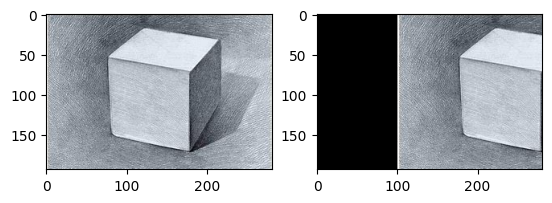

In [4]:
# 定义平移参数（向右平移100像素，向下平移50像素）
tx, ty = 100, 0 

# 矩阵形式：[[1, 0, tx], [0, 1, ty]]
M = np.float32([[1, 0, tx], [0, 1, ty]])  # 

height, width = img.shape[:2]
translated_img = cv2.warpAffine(
    img, 
    M, 
    (width, height)  # 图像尺寸
)
plt.subplot(121), plt.imshow(img), plt.subplot(122), plt.imshow(translated_img)

(<Axes: >,
 <Axes: >,
 <matplotlib.image.AxesImage at 0x11a822ce2b0>)

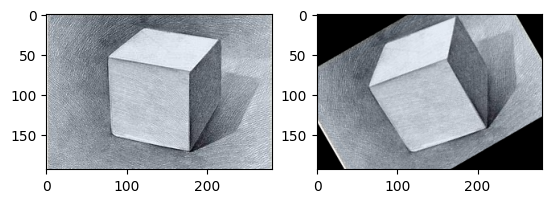

In [5]:
# 设置旋转
angle = 30  # 旋转角度（逆时针为正方向）
scale = 1.0  # 缩放比例（1.0表示不缩放）
height, width = img.shape[:2]

# 计算旋转中心
center = (width // 2, height // 2)

rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale)

# 执行旋转变换
rotated_img = cv2.warpAffine(
    img,
    rotation_matrix,
    (width, height),  # 输出图像尺寸保持原图大小
    flags=cv2.INTER_LINEAR  # 双线性插值保证平滑
)

# 显示结果
plt.subplot(121),plt.imshow(img),plt.subplot(122), plt.imshow(rotated_img)

##### 二、仿射变换
读取image_01.jpg图像，对其进行平移、旋转、缩放变换，观察并分析结果和刚体变换有什么不同

(<Axes: title={'center': 'Translated'}>,
 Text(0.5, 1.0, 'Translated'))

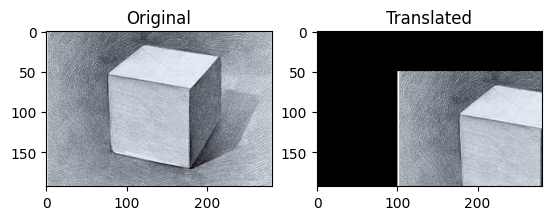

In [6]:
# 平移操作代码
# x方向平移100像素，y方向平移50像素
x, y = 100, 50

# 构造平移矩阵 [1 0 x]
#           [0 1 y]
M = np.float32([[1, 0, x], 
                [0, 1, y]])

# 获取原始图像尺寸
rows, cols = img.shape[:2]
# 平移操作
translated_img = cv2.warpAffine(
    src=img,               # 输入图像
    M=M,                   # 2x3变换矩阵
    dsize=(cols, rows),    # 输出图像尺寸
    flags=cv2.INTER_LINEAR # 线性插值
)

plt.subplot(121), plt.imshow(img), plt.title('Original')
plt.subplot(122), plt.imshow(translated_img), plt.title('Translated')

(<Axes: >, <matplotlib.image.AxesImage at 0x11a8255d040>)

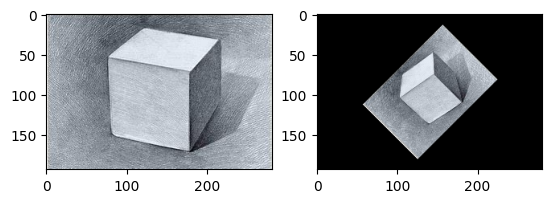

In [10]:
# 2. 获取图像尺寸
rows, cols = img.shape[:2]  # 获取高度(rows)和宽度(cols)

# 3. 定义旋转参数
center = (cols/2, rows/2)  # 旋转中心（图像中心）
angle = 45                 # 旋转角度（正值为逆时针）
scale = 0.5               # 缩放比例（1表示不缩放）

# 4. 旋转矩阵
rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale)  # 

# 5. 仿射变换
rotated_img = cv2.warpAffine(
    img, 
    rotation_matrix, 
    (cols, rows),          # 输出图像尺寸
    flags=cv2.INTER_LINEAR # 线性插值保证平滑
)


plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(rotated_img)

(<Axes: >,
 <Axes: >,
 <matplotlib.image.AxesImage at 0x11a827be880>)

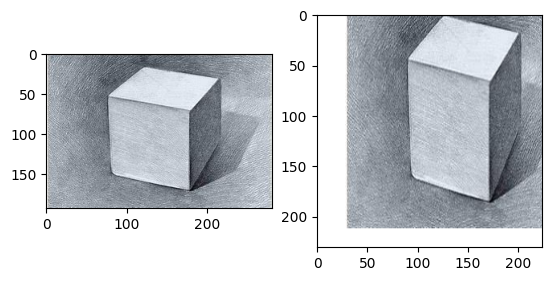

In [13]:
scale_x = 0.8      # X轴独立缩放比例
scale_y = 1.2      # Y轴独立缩放比例

def anisotropic_scaling(image, scale_x, scale_y):
    height, width = image.shape[:2]
    center = (width // 2, height // 2)
    
    # 构建缩放矩阵
    M = np.array([
        [scale_x, 0, center[0] * (1 - scale_x)],
        [0, scale_y, center[1] * (1 - scale_y)]
    ], dtype=np.float32)
    
    new_width = int(width * scale_x)
    new_height = int(height * scale_y)
    
    return cv2.warpAffine(
        image, M, 
        (new_width, new_height),  # 自适应新尺寸
        flags=cv2.INTER_CUBIC,    # 立方插值保证质量
        borderMode=cv2.BORDER_CONSTANT,
        borderValue=(255, 255, 255)  # 白色填充
    )

# 执行缩放操作
aniso_scaled = anisotropic_scaling(img, scale_x, scale_y)
plt.subplot(121), plt.imshow(img), plt.subplot(122), plt.imshow(aniso_scaled)

##### 三、透视变换
读取image_02.png图像，对其进行透视变换以矫正倾斜情况

In [15]:
# 读取图像文件
img_path = r"F://Source-code-management-repository/MyHome/Machine vision/Data/image_02.png"
img = cv2.imread(img_path, 1)
# plt.imshow(img)

(<Axes: >, <matplotlib.image.AxesImage at 0x11a85433c40>)

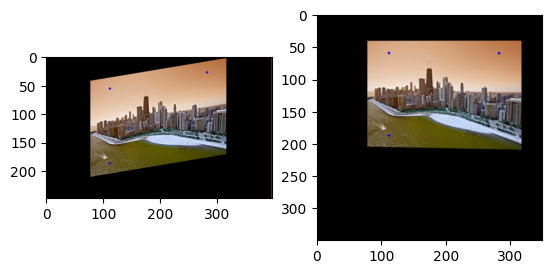

In [31]:
# 2. 定义源点（src）和目标点（dst） 
# ！需根据实际图像调整坐标值！
src_points = np.float32([
    [80, 48],    # 原始区域左上角
    [320, 0],   # 原始区域右上角
    [320, 160],  # 原始区域右下角
    [80, 210]    # 原始区域左下角
])
dst_points = np.float32([
    [80, 48],                 # 矫正后左上角
    [320, 40],               # 矫正后右上角
    [320,200],             # 矫正后右下角
    [80,205]                # 矫正后左下角
])

# 3. 计算透视变换矩阵
M = cv2.getPerspectiveTransform(src_points, dst_points)

# 4. 执行透视变换（输出尺寸设为300x300）
warped = cv2.warpPerspective(img, M, (350, 350))

# 5. 显示结果
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(warped)